# Image_Classification

In [1]:
# ! pip install tensorflow

# Importing basic libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
y_train[0]

5

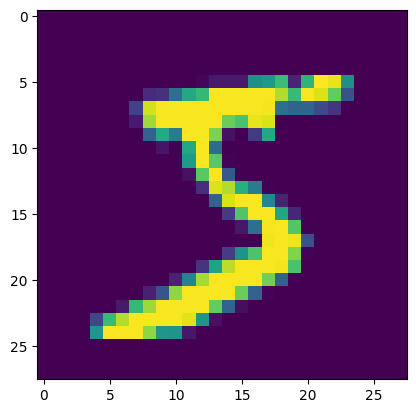

In [5]:
plt.imshow(X_train[0])

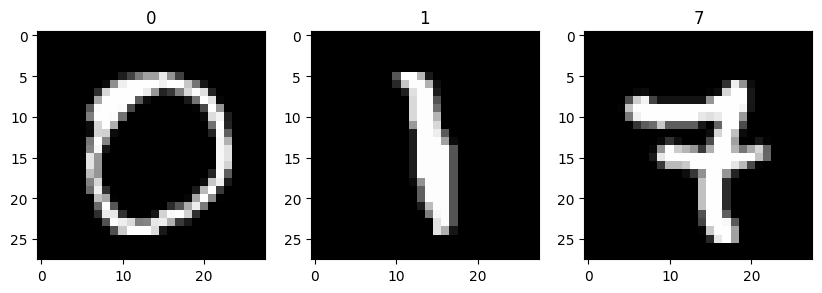

In [6]:
# visualizing the data

fig, axes = plt.subplots(1,3, figsize = (10,10))
axes = axes.flatten()

for i in np.arange (0,1*3):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index], cmap = 'gray')
    axes[i].set_title(y_train[index])
    
plt.show()


In [7]:
X_train = X_train.reshape(-1,28*28)/255.0
X_test = X_test.reshape(-1,28*28)/255.0

In [8]:
# to create a new virtual env
# python -m venv img_clf

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(130, activation="relu", input_shape = (784,)),
    tf.keras.layers.Dense(70, activation="relu",),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(optimizer='adam', loss= "sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 130)               102050    
                                                                 
 dense_1 (Dense)             (None, 70)                9170      
                                                                 
 dense_2 (Dense)             (None, 10)                710       
                                                                 
Total params: 111930 (437.23 KB)
Trainable params: 111930 (437.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train,y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2391 - accuracy: 0.9311 - val_loss: 0.1205 - val_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.1122 - val_accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.0819 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9826 - val_loss: 0.0806 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0929 - val_accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0787 - val_accuracy:

313/313 [==============================] - 1s 4ms/step - loss: 0.0868 - accuracy: 0.9793
Test Accuracy: 97.93%


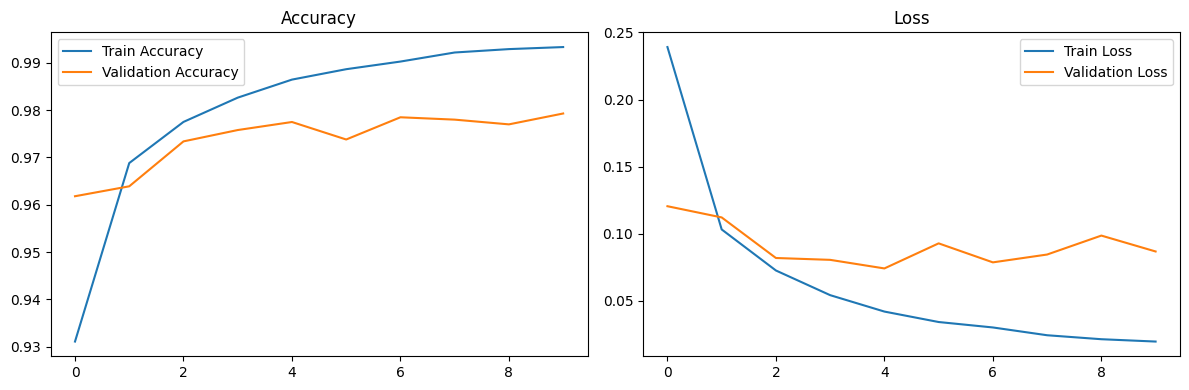

In [13]:
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting the training accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()